In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
sns.set(
        font_scale = 2,
        style      = 'whitegrid',
        rc         = {'figure.figsize':(20, 7)})

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Данные для построения графика хранятся 

In [4]:
url = 'https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv'

In [5]:
df = pd.read_csv(url)

In [183]:
df.

date          object
user_type     object
visits       float64
dtype: object

In [8]:
df.shape

(6, 3)

In [25]:
n_df = df.pivot(index='date', columns='user_type', values='visits').reset_index()

In [26]:
n_df

user_type,date,People,Robots
0,2020-06-15,417.0,177.0
1,2020-06-16,472.0,91.0
2,2020-06-17,475.0,138.0


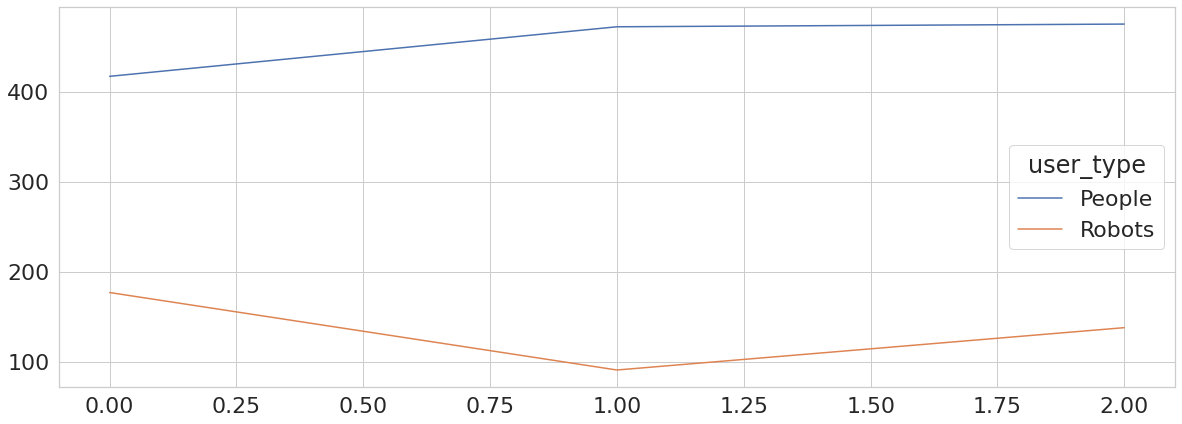

In [27]:
n_df.plot()

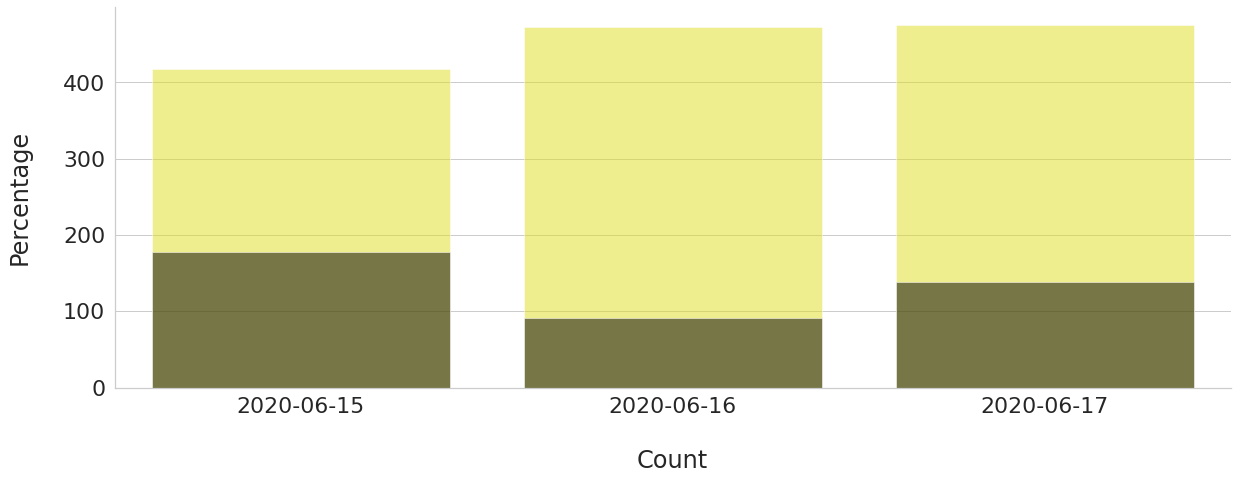

In [36]:
ax = sns.barplot(x='date', y='People', data=n_df, color='yellow', alpha=0.5)
ax.set(xlabel='\nCount', ylabel='Percentage\n')
bx = sns.barplot(x='date', y='Robots', data=n_df, color='black', alpha=0.5)
bx.set(xlabel='\nCount', ylabel='Percentage\n')
sns.despine()  # убрать часть рамки графика
plt.show()


Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.

Ответ округлите до целого.

In [37]:
path2 = 'https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv'

In [184]:
ya = pd.read_csv(path2)

In [185]:
ya.head(10)

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [186]:
ya.nunique()

date        1
browser    15
visits     11
dtype: int64

In [71]:
ya.visits.sum()

594.0

In [49]:
index = ya.browser.loc[ya.browser.str.contains('Google Chrome')]

In [51]:
a = ya.visits[0]

In [52]:
b = ya.visits.sum()

In [56]:
f=(a/b*100).round()

In [57]:
f

60.0

Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

В качестве ответа укажите название браузера.

In [60]:
path3 = 'https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv'

In [61]:
browser = pd.read_csv(path3)

In [63]:
browser.head(3)


,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0


In [188]:
leader = browser.groupby(['browser', 'user_type'], as_index = False)\
        .agg({'visits':'sum'})\
        .rename(columns={'date': 'visits'})\
        .sort_values('visits', ascending = False)

In [189]:
leader

,browser,user_type,visits
9,Google Chrome,People,250.0
10,Google Chrome,Robots,104.0
21,Yandex Browser,People,47.0
1,Chrome Mobile,People,31.0
8,Firefox,Robots,31.0
7,Firefox,People,27.0
16,Safari,Robots,22.0
15,Safari,People,19.0
11,Mobile Safari,People,15.0
13,Opera,People,11.0


In [190]:
pivot = leader.pivot(index='browser', columns='user_type', values='visits').reset_index()

In [195]:
pivot = pivot.fillna(0)

In [196]:
pivot['all'] = pivot.People + pivot.Robots
    

In [197]:
pivot

user_type,browser,People,Robots,all
0,Android Browser,1.0,0.0,1.0
1,Chrome Mobile,31.0,0.0,31.0
2,Chromium,1.0,1.0,2.0
3,CocCoc,1.0,0.0,1.0
4,Edge,4.0,1.0,5.0
5,Firefox,27.0,31.0,58.0
6,Google Chrome,250.0,104.0,354.0
7,Mobile Safari,15.0,1.0,16.0
8,Opera,11.0,5.0,16.0
9,Safari,19.0,22.0,41.0


In [199]:
pivot['rate'] = pivot['Robots'] / pivot['all']
pivot.sort_values('rate', ascending= False)

user_type,browser,People,Robots,all,rate
11,UCWEB,0.0,4.0,4.0,1.000000
9,Safari,19.0,22.0,41.0,0.536585
5,Firefox,27.0,31.0,58.0,0.534483
2,Chromium,1.0,1.0,2.0,0.500000
8,Opera,11.0,5.0,16.0,0.312500
6,Google Chrome,250.0,104.0,354.0,0.293785
4,Edge,4.0,1.0,5.0,0.200000
13,Yandex Browser,47.0,7.0,54.0,0.129630
10,Samsung Internet,8.0,1.0,9.0,0.111111
7,Mobile Safari,15.0,1.0,16.0,0.062500


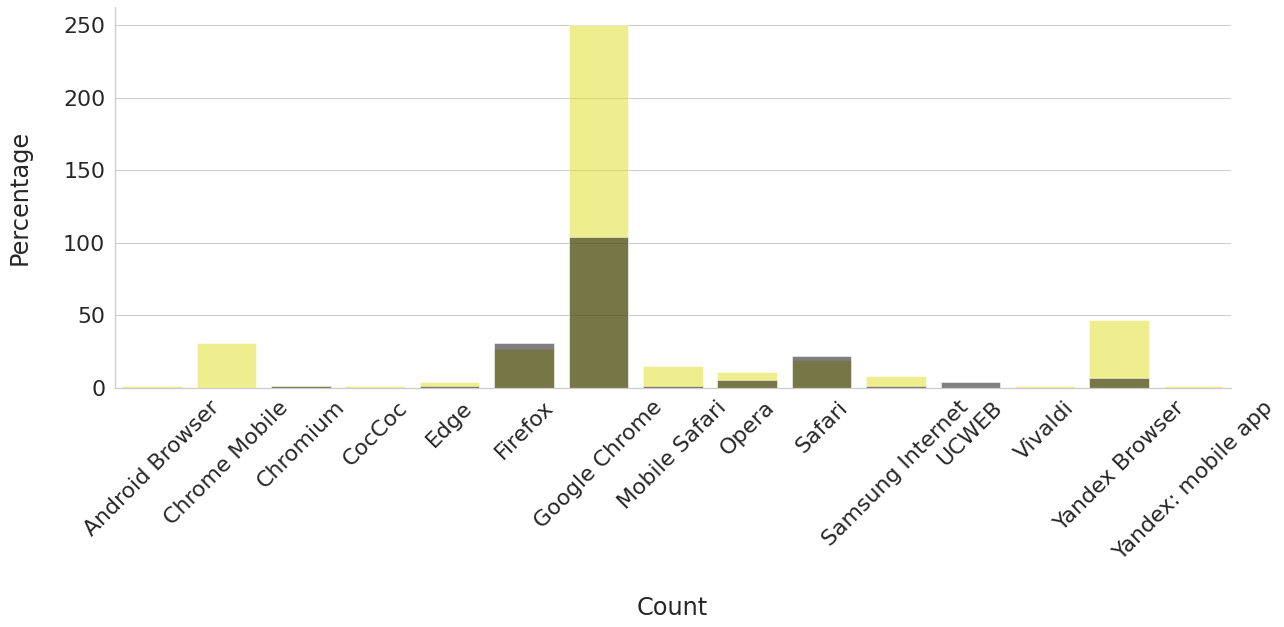

In [200]:
ax = sns.barplot(x='browser', y='People', data=pivot, color='yellow', alpha=0.5)
ax.set(xlabel='\nCount', ylabel='Percentage\n')
bx = sns.barplot(x='browser', y='Robots', data=pivot, color='black', alpha=0.5)
bx.set(xlabel='\nCount', ylabel='Percentage\n')
ax.set_xticklabels(pivot['browser'], rotation = 45)
sns.despine()  # убрать часть рамки графика
plt.show()

Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [166]:
urla = 'https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv'

In [227]:
doli = pd.read_csv(urla)

In [228]:
doli.head(4
        )

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0


In [249]:
all = doli.visits.sum()

In [250]:
all

594.0

In [225]:
doli_all = doli.groupby(['browser'], as_index = False)\
        .agg({'visits': 'sum'})
doli_all.head(10
         )

,browser,visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0
5,Firefox,58.0
6,Google Chrome,354.0
7,Mobile Safari,16.0
8,Opera,16.0
9,Safari,41.0


In [230]:
merged = doli.merge(doli_all, on= 'browser')

In [239]:
merged.head()

,date,browser,user_type,visits_x,visits_y,people_rate,rate
0,2020-06-15,Google Chrome,People,250.0,354.0,0.706215,0.706215
1,2020-06-15,Google Chrome,Robots,104.0,354.0,0.293785,0.293785
2,2020-06-15,Yandex Browser,People,47.0,54.0,0.870370,0.870370
3,2020-06-15,Yandex Browser,Robots,7.0,54.0,0.129630,0.129630
4,2020-06-15,Firefox,Robots,31.0,58.0,0.534483,0.534483


In [237]:
merged['rate'] = merged.visits_x / merged.visits_y

In [243]:
merged.query('user_type == "People" and browser == "Safari"')

,date,browser,user_type,visits_x,visits_y,people_rate,rate
8,2020-06-15,Safari,People,19.0,41.0,0.463415,0.463415


In [246]:
round(0.463415*100, 1)

46.3

In [251]:
pivotd = doli.pivot(index='browser', columns='user_type', values='visits').reset_index()

In [252]:
pivotd.fillna(0, inplace=True)

In [253]:
pivotd

user_type,browser,People,Robots
0,Android Browser,1.0,0.0
1,Chrome Mobile,31.0,0.0
2,Chromium,1.0,1.0
3,CocCoc,1.0,0.0
4,Edge,4.0,1.0
5,Firefox,27.0,31.0
6,Google Chrome,250.0,104.0
7,Mobile Safari,15.0,1.0
8,Opera,11.0,5.0
9,Safari,19.0,22.0


In [254]:
pivotd['people_rate'] = pivotd['People']/ all


In [255]:
pivotd.tail(10)

user_type,browser,People,Robots,people_rate
5,Firefox,27.0,31.0,0.045455
6,Google Chrome,250.0,104.0,0.420875
7,Mobile Safari,15.0,1.0,0.025253
8,Opera,11.0,5.0,0.018519
9,Safari,19.0,22.0,0.031987
10,Samsung Internet,8.0,1.0,0.013468
11,UCWEB,0.0,4.0,0.000000
12,Vivaldi,1.0,0.0,0.001684
13,Yandex Browser,47.0,7.0,0.079125
14,Yandex: mobile app,1.0,0.0,0.001684


In [256]:
((pivotd.loc[9, 'people_rate'])*100).round(1)

3.2